# Clase 14 practica SQL

Esta práctica consiste en reforzar los conceptos ya vistos, ya que serán de gran utilidad para la creación de la base de datos de películas de nuestro proyecto dividido en 3 entregables.

Para iniciar con el proceso de desarrollo, en donde ustedes serán los encargados de bases de datos y hacer que el backend funcione, debemos tener instalados los siguientes programas:

1. Si estamos en los computadores de la universidad, únicamente instalaremos pgadmin, https://www.pgadmin.org/download/, no será necesario instalar postgres.
2. En los computadores personales la instalación de estas herramientas (postgreSQL - PGadmin) las hicimos previamente.
3. Instalar visual estudio code https://code.visualstudio.com/download
4. Instalar node JS https://nodejs.org/en/
5. Para probar los servicios https://insomnia.rest/ o https://www.postman.com/downloads/

**Recuerde tener instalado git y clonar previamente el repositorio de trabajo. Si ya tiene el proyecto recuerde actualizar la rama con** `git pull origin develop`

### Conexión a base de datos:

Para conectarse a la base de datos puede utilizar la de la red local (la cual solo funcionará en clase) o la remota la cual está siendo ejecutada sobre el servicio RDS de AWS. La ip se otorgará en el salón de clase. **Por favor no comparta las credenciales con personas ajenas al curso por seguridad**.

Para iniciar la conexión abre pgadmin y sobre la opción **Servers** del menú de la izquierda, da clic derecho y elige **create server**

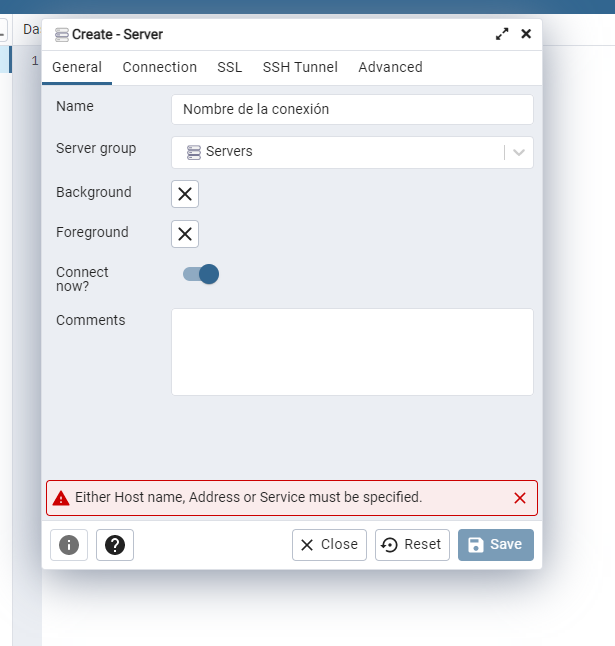

Proporcione un nombre a la conexión y luego de clic en el tab connection:

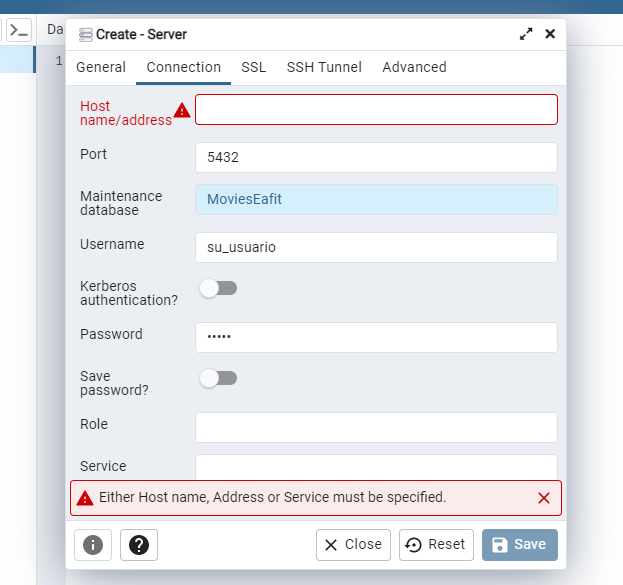

Proporcione las credenciales dadas en clase y luego de clic en el botón save. Al finalizar tendrá acceso a la base de datos.

### Visualización de base de datos

Cuando realice la conexión despligue la opción con el nombre asignado previamente y elija la base de datos con la que trabajaremos de aquí en adelante "Movies Eafit".

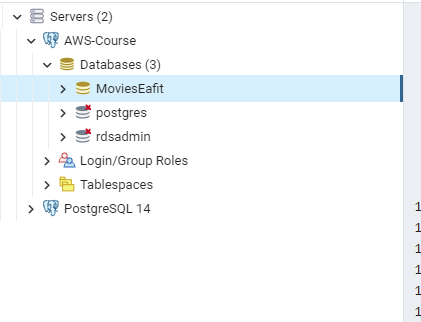

Las bases de datos, tiene la siguiente estructura:

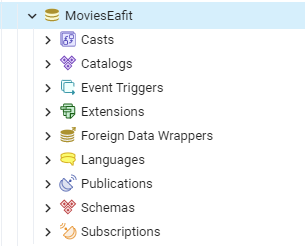

Para ver los esquemas disponibles donde empezará a trabajar cada grupo, desplegar la opción Schemas para ver más.

Cada grupo tiene la siguiente asignación de esquemas:

- sa_ma_hu (Grupo 1)
- cvj (Grupo 2)
- miguapa (Grupo 3)
- sapos_g (Grupo 4)
- dinamita (Grupo 5)
- avcoro (Grupo 6)
- seva (Grupo 7)

(Si alguno falta en la lista por favor informar)

Para ver el contenido del esquema, dar clic sobre el asignado. Aquí se podrán ver las tablas, relaciones entre tablas, procedimientos, funciones, tipos de datos, triggers, vistas.

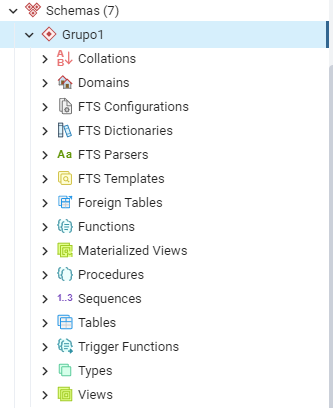



Considerando el trabajo 1 (aún falta el proceso de revisión y la normalización), vamos a contruir la estructura de la base de datos, para ello vamos a tomar el modelo de cada uno entregado en el trabajo (recuerden que luego debemos hacer los ajustes de normalización, por ahora solo tomaremos el modelo tal cual lo tenemos para prueba). Vamos a crear las tablas USANDO SENTENCIAS SQL, NO LA INTERFAZ GRÁFICA.

Para abrir el editor de código damos clic en el siguiente icono de la barra superior.

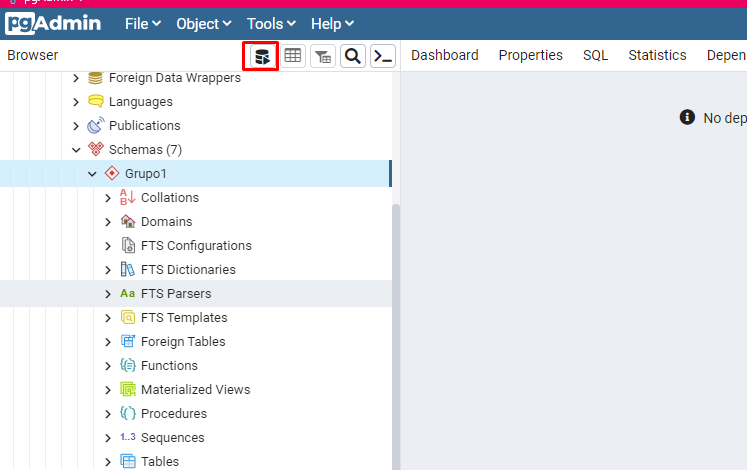

Lo primero que debemos hacer es cambiar la clave por una que solo conozca el equipo. Ejecute el comando tal cual se muestra en la imagen. Si el cambio fue exitoso usted perderá conexión con la base de datos, por lo que deberá conectarse de nuevo.

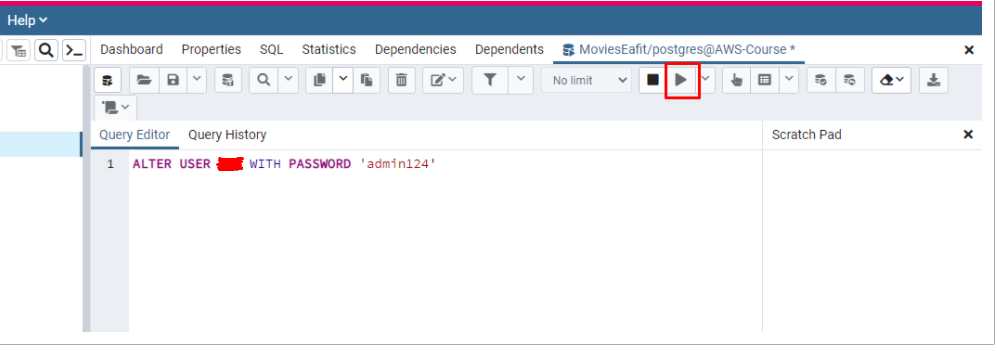

Sobre el mismo archivo, cree las sentencias de creación de las tablas definidas por usted en un inicio, revise las clases anteriores para lograr esto. al tener las tablas con sus respectivos constraints, inserte cinco registros por cada tabla. 

Al finalizar presione el icono de guardar para almacenar el archivo. Este script deberá subirlo al git utilizando los comandos vistos previamente en clase.

`git add .`  
`git commit -m ""`  
`git push origin feature/nombre_rama`

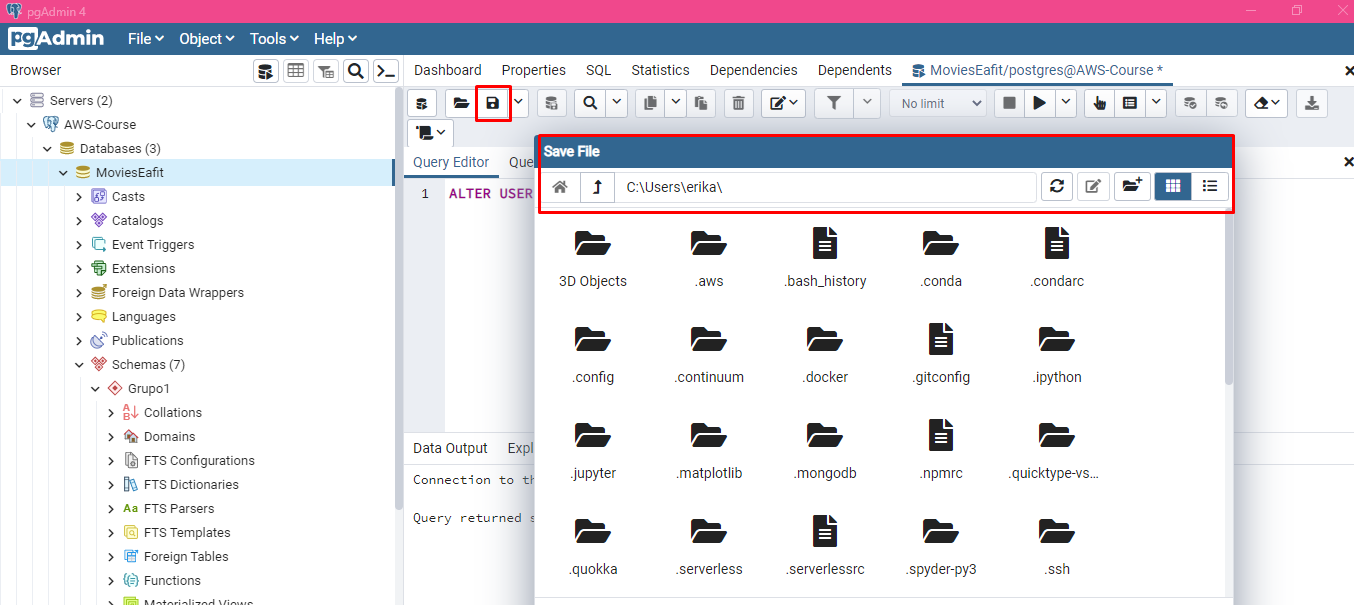

### Parte 2:

- Vamos a practicar las sentencias update y delete. Crea una sentencia que actualice la contraseña de un usuario siguiendo

`UPDATE table_name 
SET column = value
Where column = condition`

Importante agregar siempre el where a la sentencia update, ya que si se hace con dicha clausula, pueden afectar todos los registros.

- Utiliza la sentencia delete para eliminar un registro de la base de datos
`DELETE FROM table_name WHERE column = condition;`

Teniendo en cuenta lo anterior, vamos a crear un CRUD básico de prueba que nos ayudará a entender como funciona el backend de una aplicación web, además de como se integran las bases de datos en la vida real. En este caso nos será de ayuda para entender mejor el desarrollo de la aplicación moviesEafit

Para hacer la práctica, descargar los cambios de la rama develop `git pull origin develop`, con esto ya tendremos la nueva carpeta Servidor, la cual nos permitira hacer un CRUD por medio de aun API RESTful, exponiendo endpoints que luego serán utilizados por un front o sitio web para consultar e interactuar con la base de datos.

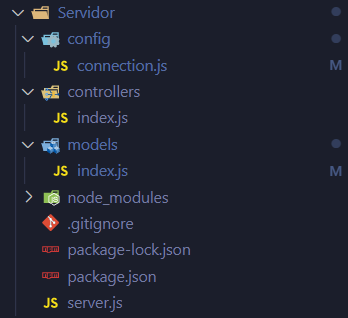

La carpeta está estructurada con base al patrón de diseño MVC donde tenemos un modelo y un controlador (vista en construcción). Para hacer las modificaciones e iniciar el proceso de construcción de mi primera API, hacer los siguientes pasos:

1. Ir a la carpeta config y en el script `connection.js` añadir las credenciales de conexión, son las mismas utilizada en pgadmin4.


`const { Pool } = require("pg")`

`const pool = new Pool({
  user: "su nombre de usuario",
  host: "se encuentra en interactiva",
  database: "MoviesEafit",
  password: "su clave",
  port: 5432,
});`

`pool.on('connect', () => {
  console.log('MoviesEafit DB up!');
});`

`module.exports = pool`

**Al subir los ajustes al repositorio NO SUBIR LAS CREDENCIALES, DEBE DESCARTAR ESTE ARCHIVO**

2. Luego, ejecute el proyecto (recuerde haber instalado nodeJS previamente), instale primero los módulos necesarios con el comando en consola `npm install`(debe estar ubicado en la carpeta del proyecto)

3. Ejecute el comando `node server.js` para iniciar el servidor. No se mostrará nada en consola, por ello para validar deberá poner la siguiente url en el navegador `http://localhost:5000/api` 

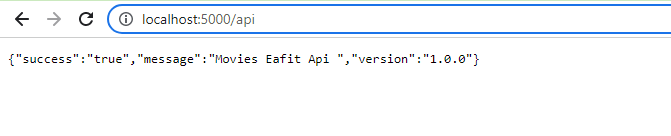

#### Editando el código

Para interactuar con la base de datos crearemos una API ( Interfaz de Programación de Aplicaciones) RESTful.

RESTful parte de **REST**, que significa Representational State Transfer o transferencia de estado representacional. Corresponde a una capa de abstración que permite la transferencia de recursos.

Una API RESTful es una interfaz que utiliza los principios REST para crear comunicación entre un cliente (frontend) y un servidor (backend). Una API de este tipo hace uso de métodos HTTP (lo cual permite comunicar con un servidor mediante una url)

- GET
- POST
- PUT
- DELETE

Para la clase de bases de datos vamos a utilizar GET y POST.

Para aprender un poco más sobre lo que es una API y sus definiciones ir al siguiente link: https://blog.postman.com/rest-api-examples/


Ahora, para agregar una nueva consulta utilice el código de ejemplo de models/index.js, puede modificar el ya existente o copiar y agregar una nueva consulta, la estructura está de la siguiente manera.


` async getAllUser() { // Esta función permitirá obtener usuarios y cuenta con dos parametros
        const querySelect = `` // Aquí deberá poner la sentencia SQL
        const result = await connection.query(querySelect) // Ejecución de la sentencia SQL
        return result // Se devuelve el resultado de la sentencia SQL
    },`
    
Ejemplo con datos reales (recuerde modificar según el nombre de su tabla, columnas y esquema"

`async getAllUser() {
        const querySelect = 'SELECT * FROM "Grupo 2".usuario;'
        const result = await connection.query(querySelect)
        return result
    },`
    
Cree las sentencias necesarias para obtener un usuario, insertar usuario, actualizar usuario, eliminar usuario. Luego repita esto mismo para la tabla de peliculas.

Para exponer la función encargada de consultar los usuarios por medio de un url deberá hacer lo siguiente: 

- Ir a la carpeta controllers, archivo index.js
- Crear una ruta de tipo get  

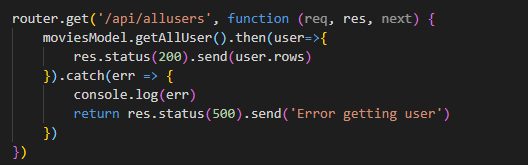

- La linea moviesModel.getAlluser() obtiene la función que hemos acabado de crear en models.
- la linea res.status(200).send(user.rows), esta indicando el codestatus 200, lo cual significa sentencia ejecutada exitosamente y user.rows, captura la información devuelta al ejecutar la sentencia.

**En la carpeta controller se encuentra el script que permite agregar los puntos de acceso para enviar las peticiones desde un cliente o interfaz y permitir la interacción con la base de datos, solo cree rutas de tipo GET o POST**

Para crear una petición de tipo POST, hacer lo siguiente:

- Ir de nuevo a models -> index.js
- Crear la función y la sentencia

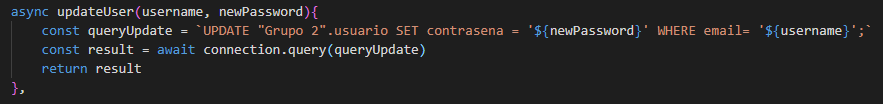

- La linea queryUpdate , tiene la sentencia SQL para actuaizar un registro. Como se observa la función recibe dos parametros, el nombre de usuario y la nueva contraseña
- Como para el caso de CREATE, UPDATE y DELETE no utilizaremos GET dado que este es solo de consulta, vamos a usar POST, como se muestra en el ejemplo.

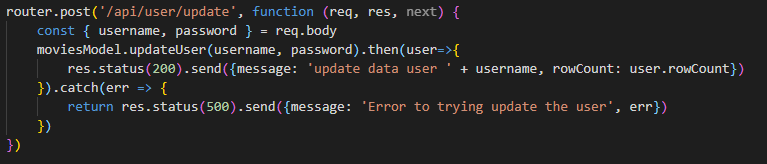

- La linea `const { username, password }= req.body`, contiene los elementos que serán entregados por medio de POST para editar. Estos parametros son los que van en la función de moviesModel.updateUser.
- Lo mismo con respecto al mensaje que se devolverá al cliente para validar si la setencia se ejecutó como se esperaba. En este caso se devuelve un JSON que tiene un message y un rowCount, que tiene la información de cuantos registros se modificaron, este valor debería ser 1.

Para probar el nuevo servicio, 

- abrir la aplicación POSTMAN
- Dar clic en el más abrir una nueva pestaña, por defecto el tipo de petición es GET, dar clic sobre el desplegable para cambiar el tipo.

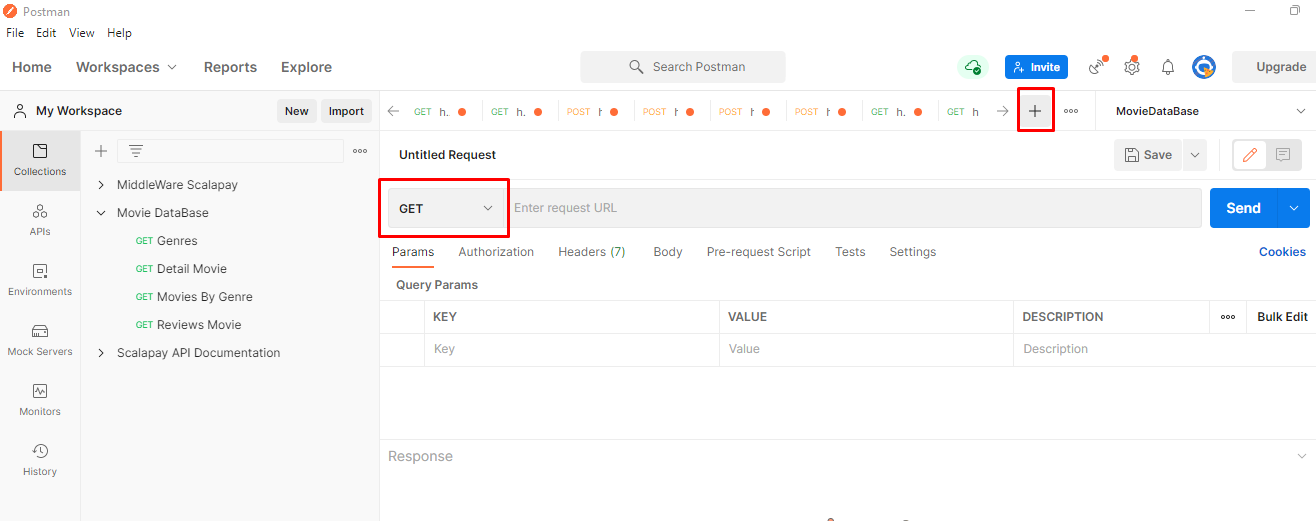

- Agregue la nueva url, recuerde que por defecto es http://localhost:5000 la cual debe complementar con la url agregada desde el route.post /api/user/update. Url resultante: http://localhost:5000/api/user/update.
- Ir ahora a la opción body y agregar el JSON que le permitirá pasar los parametros a la función.
- En body, elegir la opción RAW y luego JSON
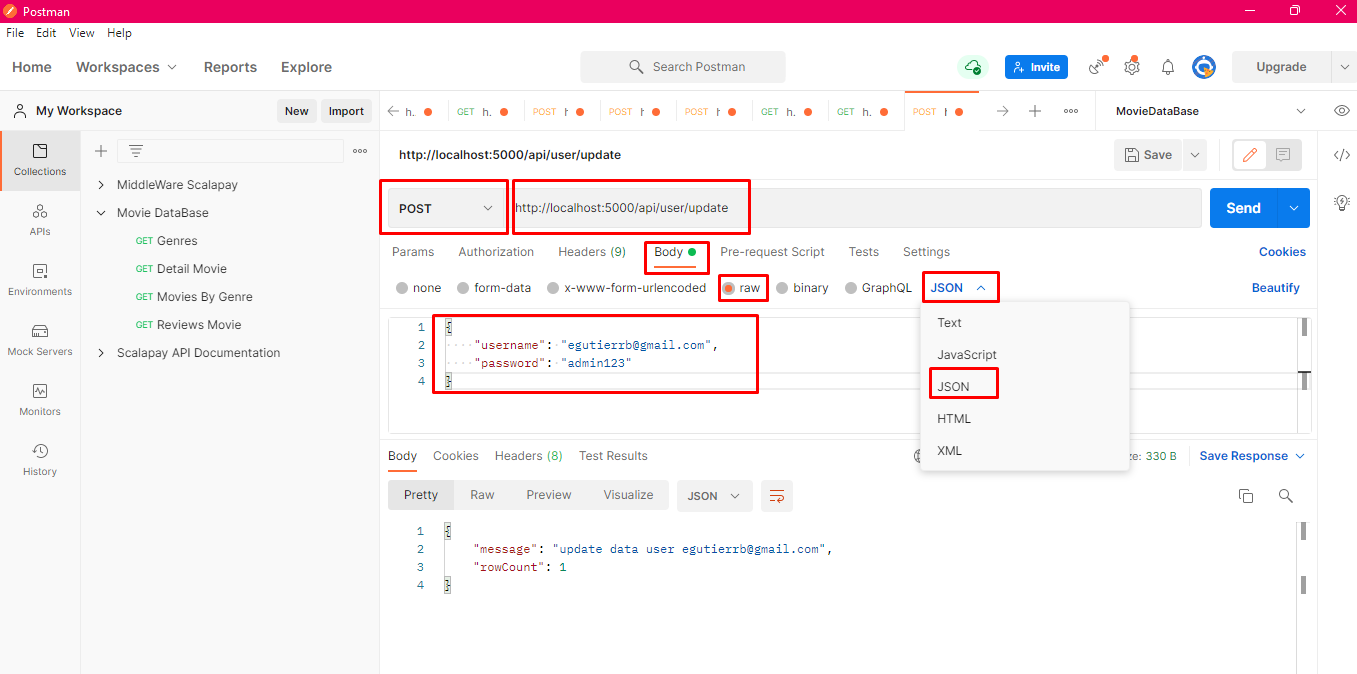
- El JSON a entregar como body cambia, según el tipo de parametros de la función y cantidad.

Los puntos de acceso esperados para ejecutar con éxito esta práctica son: 

/** Rutas esperadas para este ejercicio practico:
 * /api/login
 * /api/profile or /api/user
 * /api/profile/create or /api/user/create
 * /api/profile/update or /api/user/update
 * /api/profile/crete or /api/user/delete
 * /api/movies
 * /api/movies/:id
 * /api/movies/create
 * /api/movies/update
 * /api/movies/delete
 */

**Intenta identificar que otros servicios necesitarias para interactuar con la base de datos y las demás tablas**